# Исследование данных интернет-магазина «Стримчик».

Вы работаете в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Вам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

Перед вами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и вы планируете кампанию на 2017-й. Нужно отработать принцип работы с данными. Неважно, прогнозируете ли вы продажи на 2017 год по данным 2016-го или же 2027-й — по данным 2026 года.

В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».

**Описание данных:**

Name — название игры

Platform — платформа

Year_of_Release — год выпуска

Genre — жанр игры

NA_sales — продажи в Северной Америке (миллионы проданных копий)

EU_sales — продажи в Европе (миллионы проданных копий)

JP_sales — продажи в Японии (миллионы проданных копий)

Other_sales — продажи в других странах (миллионы проданных копий)

Critic_Score — оценка критиков (максимум 100)

User_Score — оценка пользователей (максимум 10)

Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

### Шаг 1. Откроем файл с данными и изучим общую информацию

**Импортруем необходимые библиотеки:**

In [1]:
import pandas as pd

In [2]:
import matplotlib.pyplot as plt

In [3]:
import numpy as np

In [4]:
from scipy import stats as st

In [5]:
from math import sqrt

In [6]:
from scipy.stats import ttest_ind

In [7]:
import seaborn as sns

**Сохраним нашу таблицу в переменную и извучим ее содержимое:**

In [8]:
df = pd.read_csv('/datasets/games.csv')
df.info()
display(df.head(20))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


**Мы видим таблицу с названием игр, названием платформы, годом выпуска, жанром, продажами в 3 регионах, остальными продажами, оценками критиков и пользователей а также рейтингом. При первом взгляде на этот датафрейм сразу можно понять, что перед началом работы с ним, требуется сделать предобработку данных.**

### Шаг 2. Подготовка данных

**Заменим названия столбцов (приведите к нижнему регистру):**

In [9]:
df.rename(columns=str.lower, inplace=True)

**Поменяем тип столбца year_of_release на int, т.к. он обозначает только год выхода игры. Для этого заменим все пропуски на 0, чтобы поучилось поменять тип:**

In [10]:
df['year_of_release'] = df['year_of_release'].fillna(0).astype(int)
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


**Поменять тип столбца user_score на float мешают строки со значением tbd. tbd - это абревеатура, означающая to be defined(будет объявлено или будет определенно). Возможно при заполнении датафремйа кто-то хотел занести эти данные позже, но по итогу так и не занес. Заменим эти значения на 0, также все пропуски в этом столбце заменим на 0 и поменяем тип данных на float:**

In [11]:
df['user_score'].replace('tbd', '0', inplace=True)
df['user_score'].fillna('0', inplace=True)
df['user_score'] = df['user_score'].astype(float)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16715 non-null  int64  
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       16715 non-null  float64
 10  rating           9949 non-null   object 
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


**Теперь перейдем к обработке пропусков в таблице:**

In [12]:
df.isna().sum()

name                  2
platform              0
year_of_release       0
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score            0
rating             6766
dtype: int64

**Посмотрим на пропуски в столбце name:**

In [13]:
df['name'].fillna('name', inplace=True)
df[df['name'] == 'name']

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,name,GEN,1993,NaN,1.78,0.53,0.00,0.08,NaN,0.0,NaN
14244,name,GEN,1993,NaN,0.00,0.00,0.03,0.00,NaN,0.0,NaN


**Эти пропуски оказались теми же самыми строками, что и пропуски в столбце genre. Т.к. их всего две, мы можем просто удалить их:**

In [14]:
df = df[df['name'] != 'name']
df[df['name'] == 'name']

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating


**Перейдем к столбцу с оценкой критиков. Пропуски заполним нулями, они будут означать, что оценки нет:**

In [15]:
df['critic_score'] = df['critic_score'].fillna(0)

**Для последнего столбца, обозначающего возрастной рейтинг, мы сделаем замену пропусков абревеатурой tbd, т.к. тип столбца текстовой и переменная категориальная:**

In [16]:
df['rating'].fillna('tbd', inplace=True)
df.isna().sum()

name               0
platform           0
year_of_release    0
genre              0
na_sales           0
eu_sales           0
jp_sales           0
other_sales        0
critic_score       0
user_score         0
rating             0
dtype: int64

**Проверим таблицу на дубликаты:**

In [17]:
df.duplicated().sum()

0

**Дубликатов в нашей таблице нет, значит можно приступать к работе с этими данными.**

**Посчитаем суммарные продажи во всех регионах и запишим их в отдельный столбец:**

In [18]:
df['total_sales'] = df['na_sales'] + df['eu_sales'] + df['jp_sales'] + df['other_sales']
df.head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,0.0,0.0,tbd,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,0.0,0.0,tbd,31.38
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,0.0,0.0,tbd,30.26
6,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E,29.80
7,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E,28.91
8,New Super Mario Bros. Wii,Wii,2009,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E,28.32
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,0.0,0.0,tbd,28.31


**Теперь этот датафрейм приведен к нормальному виду, избавлен от пропусков и дубликатов, а значит можно приступать к работе с данными.**

### Шаг 3. Исследовательский анализ данных

**Посмотрим, сколько игр выпускалось в разные годы:**

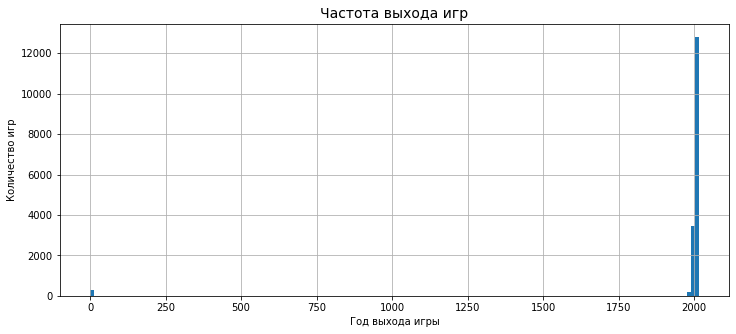

In [19]:
df['year_of_release'].sort_values().hist(bins=150, figsize=(12, 5));
plt.title('Частота выхода игр', fontsize=14)
plt.xlabel('Год выхода игры')
plt.ylabel('Количество игр');

**После заполнения пропусков нулями, в столбце year_of_release мы можем увидеть на графике эти значения. Проверим сколько их:**

In [20]:
df[df['year_of_release']==0].count()

name               269
platform           269
year_of_release    269
genre              269
na_sales           269
eu_sales           269
jp_sales           269
other_sales        269
critic_score       269
user_score         269
rating             269
total_sales        269
dtype: int64

**Так, как количество таких записей всего 269, что очень мало в сравнении с общем количеством строк, можно просто удалить их:**

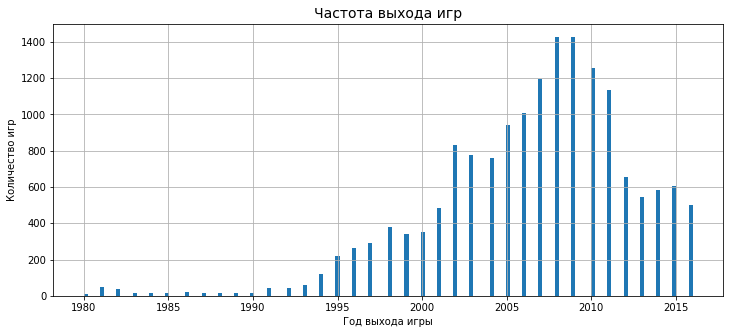

In [21]:
df = df[df['year_of_release']>0]
df['year_of_release'].sort_values().hist(bins=150, figsize=(12, 5));
plt.title('Частота выхода игр', fontsize=14)
plt.xlabel('Год выхода игры')
plt.ylabel('Количество игр');

**Видно, что пик выхода игр пришелся на 2008 и 2009 год. Количество игр, вышедших до 1990 года очень мало.**

**Посмотрим, как менялись продажи по платформам. Выберим платформы с наибольшими суммарными продажами и постройте распределение по годам.**

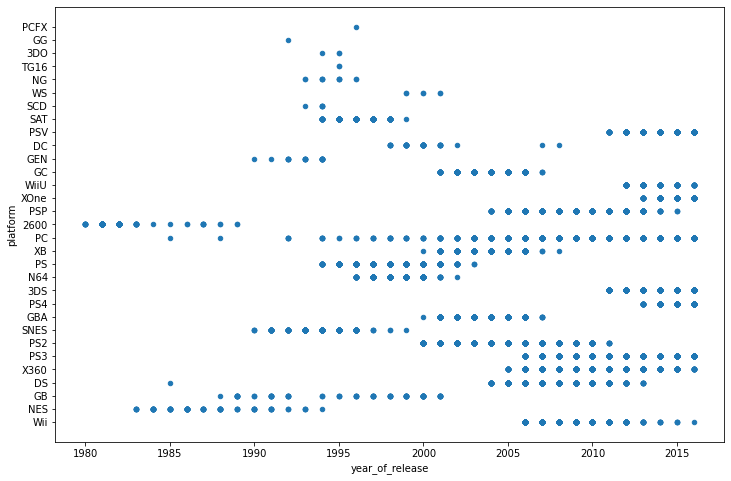

In [22]:
df.plot(x='year_of_release', y='platform', kind='scatter', figsize=(12, 8));

**На графике видно, что многие платформы уже не существуют. Возьмем более актуальный отрезок после 2000 года:**

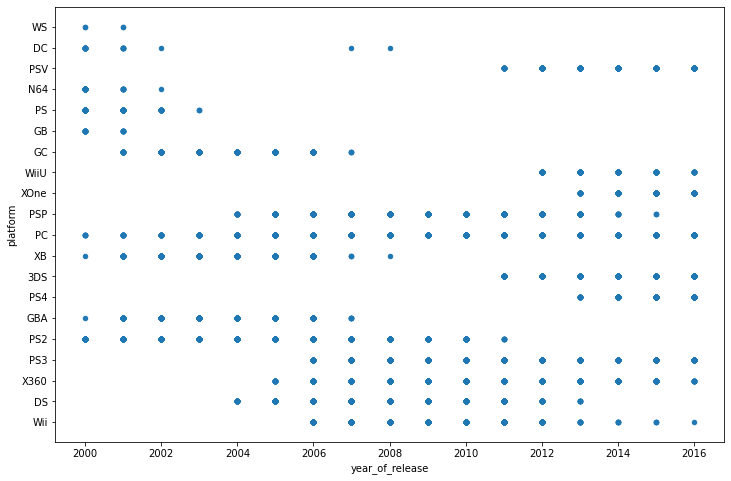

In [23]:
df[df['year_of_release']>1999].plot(x='year_of_release', y='platform', kind='scatter', figsize=(12, 8));

**Тут уже видно актуальные платформы**

**Расчитаем среднее время жизни одной платформы:**

In [24]:
mean = df.loc[:,['year_of_release', 'platform']].drop_duplicates().pivot_table(index=['platform'], values='year_of_release', aggfunc='count')
mean['year_of_release'].mean()

7.67741935483871

**Средний срок жизни у платформы составляет около 7.5 лет**

**Создадим датафрейм с актуальными платформами. Это PSV, WiiU, XOne, PSP, PC, 3DS, PS4, PS3, X360, Wii:**

In [25]:
actual_platforms = ['PSV', 'WiiU', 'XOne','PSP', 'PC', '3DS', 'PS4', 'PS3', 'X360', 'Wii']
actual_df = df[df['platform'].isin(actual_platforms)]
actual_df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
7,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E,28.91
8,New Super Mario Bros. Wii,Wii,2009,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E,28.32


**Построим график продаж для каждой из платформ за последние 5 лет:**

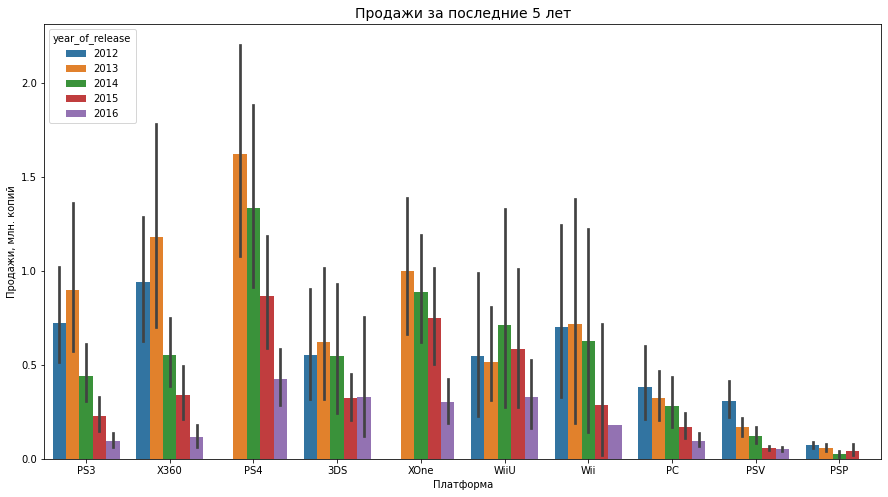

In [26]:
last_5_years = actual_df[actual_df['year_of_release'] > 2011]
plt.figure(figsize=(15, 8))
sns.barplot(data=last_5_years, x='platform', y='total_sales', hue='year_of_release')
plt.title('Продажи за последние 5 лет', fontsize=14)
plt.xlabel('Платформа')
plt.ylabel('Продажи, млн. копий');
plt.show()

**На этом графике мы видим общий объем продаж для каждой отдельной актуальной платформы на последние 5 лет. Виден общий тренд на падение продаж. Самыми прибыльными платформами можно считать PS4, XOne, X360.**

**Построем график «ящик с усами» по глобальным продажам игр в разбивке по платформам.:**

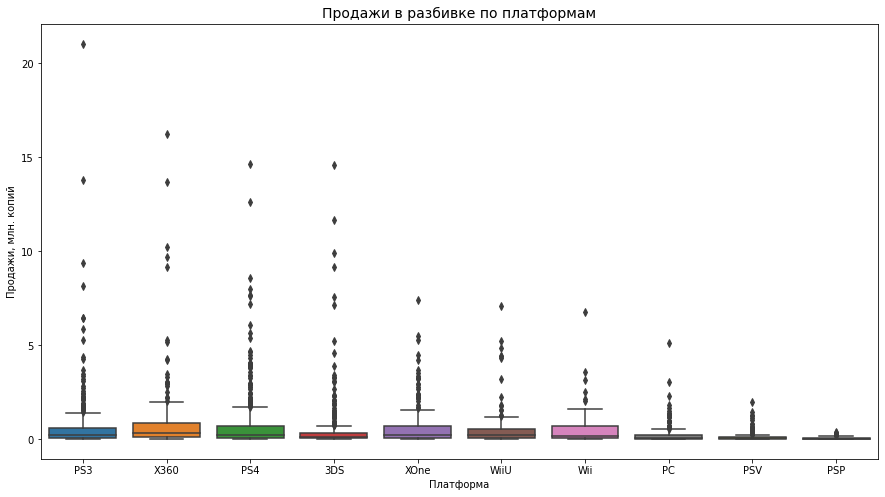

In [27]:
plt.figure(figsize=(15, 8))
sns.boxplot(data=last_5_years, x='platform', y='total_sales')
plt.title('Продажи в разбивке по платформам', fontsize=14)
plt.xlabel('Платформа')
plt.ylabel('Продажи, млн. копий');
plt.show()

<span style="color:blue"> Спасибо за пометку! Добавил.</span>

<div class="alert alert-block alert-success">
 
# Комментарий ревьюера ver.2 
    
#### Успех
    
Хорошо. Можно было еще и старые убрать

**На графике мы видим, что почти у всех платформ есть выбросы. Многих из них аномально большие (это может быть связано с какой-то невероятнот попярной игрой, выпущенной на этой платформе.**

**Зададим ограничение по оси y чтобы рассмотреть графики более детально:**

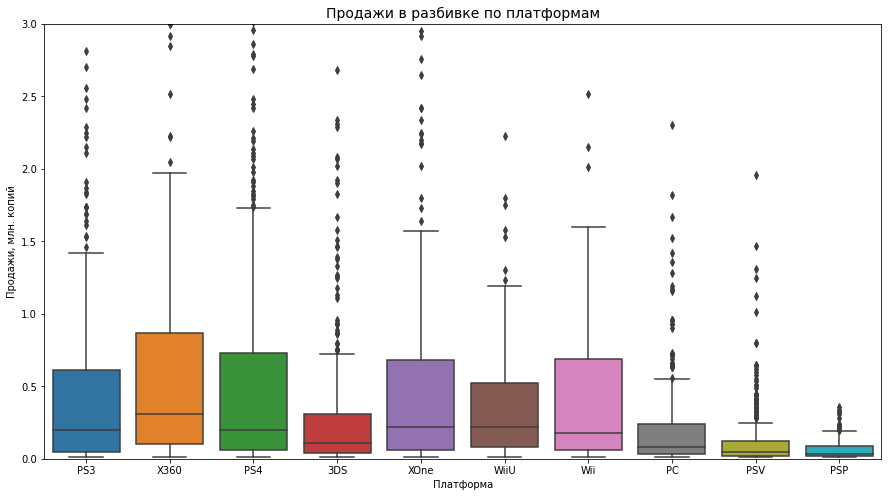

In [28]:
plt.figure(figsize=(15, 8))
plt.ylim(0,3)
sns.boxplot(data=last_5_years, x='platform', y='total_sales')
plt.title('Продажи в разбивке по платформам', fontsize=14)
plt.xlabel('Платформа')
plt.ylabel('Продажи, млн. копий');
plt.show()

**Тут нам видно, что медианы находятся на уровне около 0.2 млн. Верхняя граница размаханаходится на уровне 0.5-0.75 млн.**

**Построим график для наиболее перспективных платформ на 2016 год:**

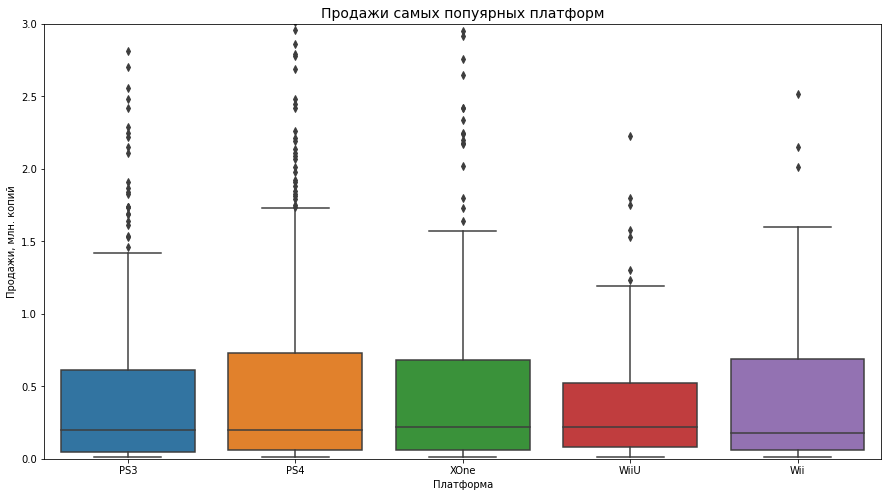

In [29]:
top_5_platforms = last_5_years.query('platform == "PS4" or platform == "XOne" or platform == "PS3" or platform == "WiiU" or platform == "Wii"')
plt.figure(figsize=(15, 8))
plt.ylim(0,3)
sns.boxplot(data=top_5_platforms, x='platform', y='total_sales')
plt.title('Продажи самых попуярных платформ', fontsize=14)
plt.xlabel('Платформа')
plt.ylabel('Продажи, млн. копий');
plt.show()

**Посмотрим, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Построем диаграмму рассеяния и посчитаем корреляцию между отзывами и продажами.**

**Возьмем популярную платформу PS4. Так как изначально пробелы в оценках отзывов мы заполнили нулями, мы условились, что оценки этой игры нет, поэтому нам нужно взять только те строки, в которых есть оценки:**

In [30]:
ps4_sales = last_5_years.query('platform=="PS4" and critic_score>0 and user_score>0')

**Посторим диаграмму рассеяния и посчитиаем корреляцию между отзывами критиков и продажами:**

Коэффицент корреляции: 0.40589480145836687


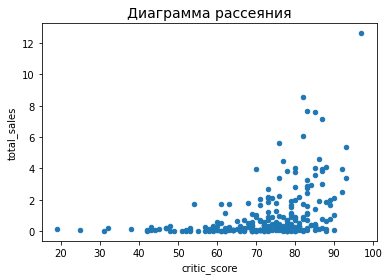

In [31]:
ps4_sales.plot(x='critic_score', y='total_sales', kind='scatter')
plt.title('Диаграмма рассеяния', fontsize=14)
print('Коэффицент корреляции:', ps4_sales['critic_score'].corr(ps4_sales['total_sales']))

<div class="alert alert-block alert-success">
 
### Комментарий ревьюера
    
#### Успех

Использован хороший метод показа зависимостей на графиках. 

**Теперь сделаем тоже самое для отзывов пользователей:**

Коэффицент корреляции: -0.03362497596528878


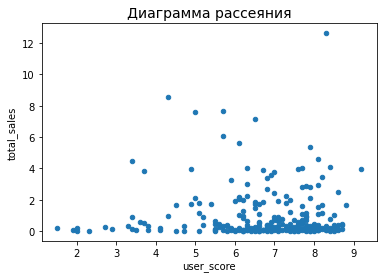

In [32]:
ps4_sales.plot(x='user_score', y='total_sales', kind='scatter')
plt.title('Диаграмма рассеяния', fontsize=14)
print('Коэффицент корреляции:', ps4_sales['user_score'].corr(ps4_sales['total_sales']))

**Можно сделать вывод, что между продажами и отзывами критиков есть средняя положительная корреляция. Между продажами и отзывами пользователей она меньше и отрицательная.**

<div class="alert alert-block alert-danger">
 
### Комментарий ревьюера
    
#### Ошибка

А вот тут стоило рассмотреть график хотя бы еще для одной из платформ актуального периода. Так наши выводы выглядели более убедительными.

<div class="alert alert-block alert-success">
 
# Комментарий ревьюера ver.2 
    
#### Успех
    
Так намного лучше вышло

<span style="color:blue"> Спасибо за пометку! Добавил.</span>

**Рассмотрим еще одну актуальную платформу XOne:**

In [33]:
xone_sales = last_5_years.query('platform=="XOne" and critic_score>0 and user_score>0')

**Диаграмма рассеяния и корреляция между отзывами критиков и продажами:**

Коэффицент корреляции: 0.41042203561296375


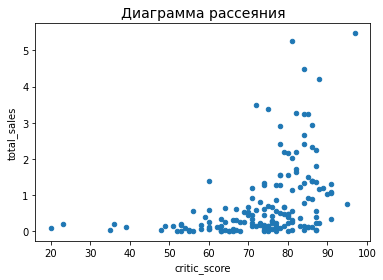

In [34]:
xone_sales.plot(x='critic_score', y='total_sales', kind='scatter')
plt.title('Диаграмма рассеяния', fontsize=14)
print('Коэффицент корреляции:', xone_sales['critic_score'].corr(xone_sales['total_sales']))

**Диаграмма рассеяния и корреляция между отзывами пользователей и продажами:**

Коэффицент корреляции: -0.09400318326920852


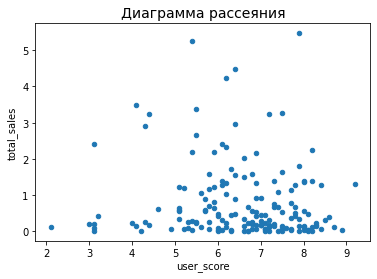

In [35]:
xone_sales.plot(x='user_score', y='total_sales', kind='scatter')
plt.title('Диаграмма рассеяния', fontsize=14)
print('Коэффицент корреляции:', xone_sales['user_score'].corr(xone_sales['total_sales']))

**Взяв вторую платформу, мы увидели идиентичную корреляцию между отзывами критиков и продажами. Корреляция же между оценками пользователей и продажами хоть и осталась отрицательной, но связь увеличилась в 3 раза.**

**Посмотрим на общее распределение игр по жанрам:** 

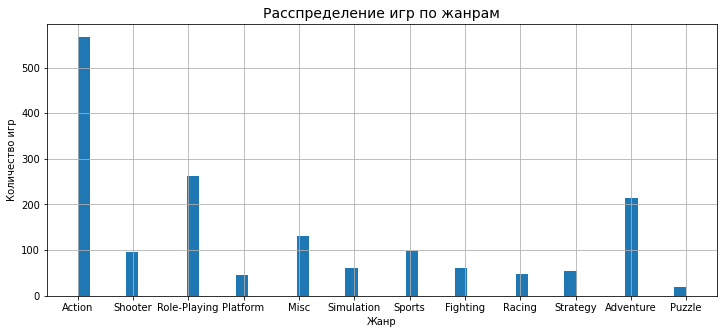

In [36]:
games = last_5_years.drop_duplicates(subset='name')
games['genre'].hist(figsize=(12,5), bins=50);
plt.title('Расспределение игр по жанрам', fontsize=14)
plt.xlabel('Жанр')
plt.ylabel('Количество игр');

**Как мы видим, самыми популярными являются жанры Action, Role-Playing и Adventure. Самым не популярным оказался жанр Puzzle.**

**Посмотрим на самые прибыльные жанры:**

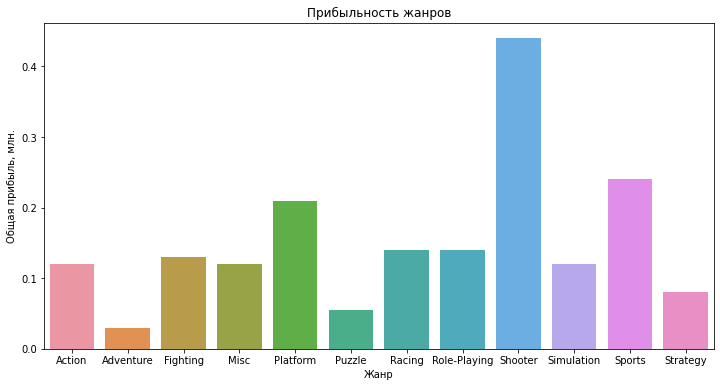

In [37]:
genre_profit = last_5_years.groupby('genre')['total_sales'].median().reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(data=genre_profit, x='genre', y='total_sales')
plt.title('Прибыльность жанров')
plt.xlabel('Жанр')
plt.ylabel('Общая прибыль, млн.')
plt.show()

<div class="alert alert-block alert-danger">
 
### Комментарий ревьюера
    
#### Ошибка
    
Высокие продажи могут быть вызваны не успехом, а просто огромным количеством игр. Вполне могут быть жанры, где игр немного, но при этом продажи сопоставимы с продажами Экшена. Чтобы проверить это, стоит рассмотреть средние или медианные продажи.

<div class="alert alert-block alert-success">
 
# Комментарий ревьюера ver.2 
    
#### Успех
    
Видишь, теперь и вывод изменился 

<span style="color:blue"> Спасибо за пометку! Исправил график и вывод.</span>

**Самыми прибыльными оказались Shooter, Sports и Platform. Самым же низкопродаваемым оказался жанр Adventure.**

### Шаг 4. Составим портрет пользователя каждого региона

**Определим для пользователя каждого региона (NA, EU, JP):**

**Самые популярные платформы (топ-5).**

**Самые популярные жанры (топ-5).**

**Влияет ли рейтинг ESRB на продажи в отдельном регионе?**


**Возьмем последний год:**

In [38]:
users = df.query('year_of_release == 2016')

**Создадим сводную таблицу, которая содержит сумму продаж в каждом регионе для всех платформ:**

In [39]:
stat_users = users.pivot_table(['na_sales','eu_sales','jp_sales','other_sales','total_sales'], ['platform'], aggfunc='sum')

**Для каждого региона построим график:**

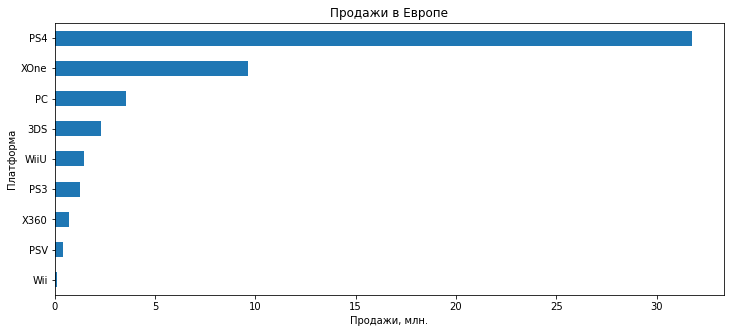

In [40]:
stat_users['eu_sales'].sort_values(ascending=True).plot.barh(figsize=(12,5));
plt.title('Продажи в Европе')
plt.xlabel('Продажи, млн.')
plt.ylabel('Платформа');

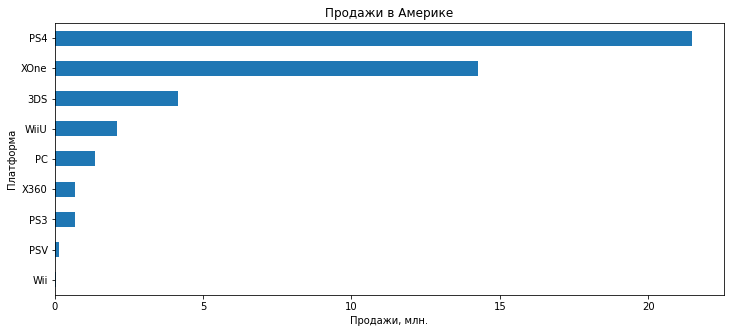

In [41]:
stat_users['na_sales'].sort_values(ascending=True).plot.barh(figsize=(12,5));
plt.title('Продажи в Америке')
plt.xlabel('Продажи, млн.')
plt.ylabel('Платформа');

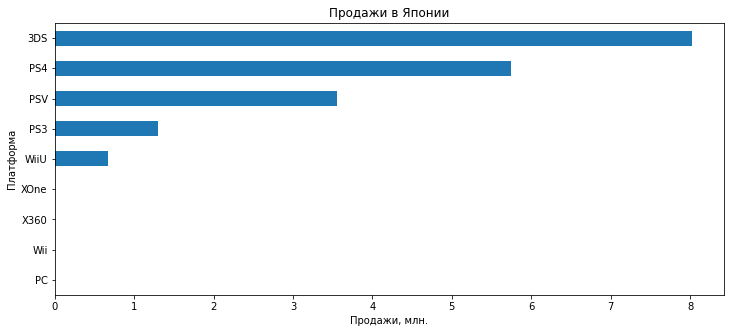

In [42]:
stat_users['jp_sales'].sort_values(ascending=True).plot.barh(figsize=(12,5));
plt.title('Продажи в Японии')
plt.xlabel('Продажи, млн.')
plt.ylabel('Платформа');

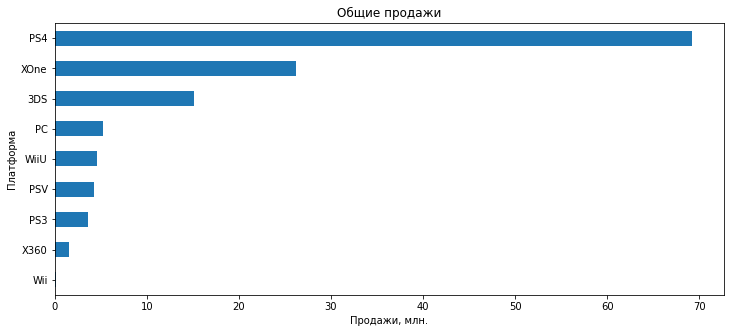

In [43]:
stat_users['total_sales'].sort_values(ascending=True).plot.barh(figsize=(12,5));
plt.title('Общие продажи')
plt.xlabel('Продажи, млн.')
plt.ylabel('Платформа');

<div class="alert alert-block alert-success">
 
### Комментарий ревьюера
    
#### Успех

Первичное представление о регионах у нас получено. Мы сформировали промежуточные выводы

**Вывод:**

**Самые популярные платформы в Европе: PS4, XOne, PC, 3DS, WiiU**

**Самые популярные платформы в Америке: PS4, XOne, 3DS, WiiU, PC**

**Самые популярные платформы в Японии: 3DS, PS4, PSV, PS3, WiiU**

**Самые популярные платформы в Мире: PS4, XOne, 3DS, PC, WiiU**

**Создадим сводную таблицу, которая содержит сумму продаж в каждом регионе для всех жанров:**

In [44]:
stat_users_genre = users.pivot_table(['na_sales','eu_sales','jp_sales','other_sales','total_sales'], ['genre'], aggfunc='sum')

**Для каждого региона построим график:**

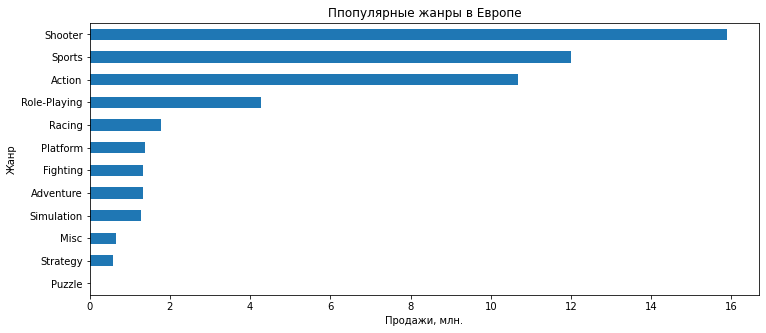

In [45]:
stat_users_genre['eu_sales'].sort_values(ascending=True).plot.barh(figsize=(12,5));
plt.title('Ппопулярные жанры в Европе')
plt.xlabel('Продажи, млн.')
plt.ylabel('Жанр');

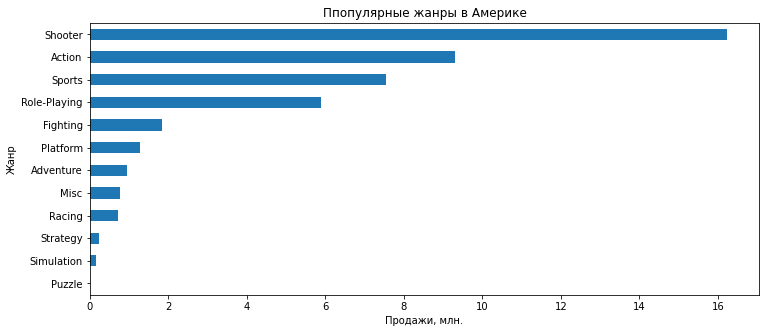

In [46]:
stat_users_genre['na_sales'].sort_values(ascending=True).plot.barh(figsize=(12,5));
plt.title('Ппопулярные жанры в Америке')
plt.xlabel('Продажи, млн.')
plt.ylabel('Жанр');

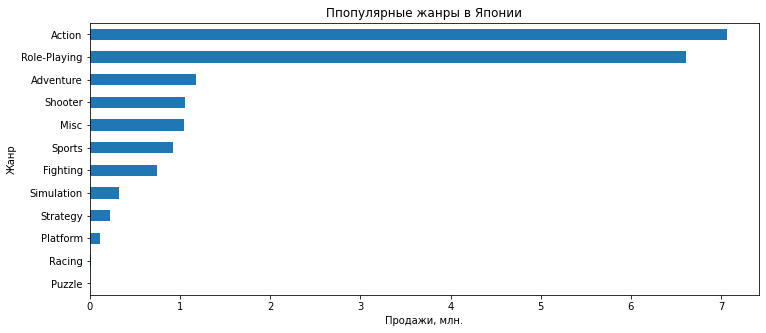

In [47]:
stat_users_genre['jp_sales'].sort_values(ascending=True).plot.barh(figsize=(12,5));
plt.title('Ппопулярные жанры в Японии')
plt.xlabel('Продажи, млн.')
plt.ylabel('Жанр');

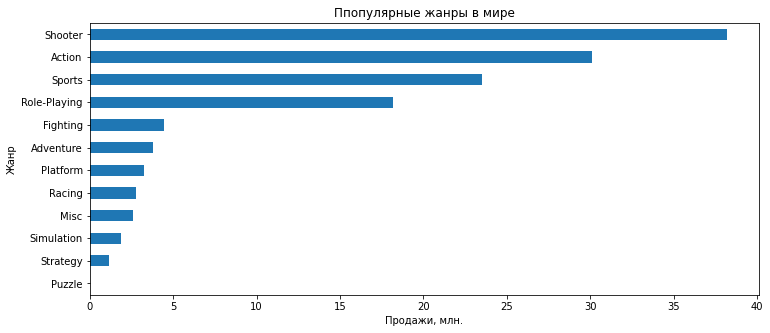

In [48]:
stat_users_genre['total_sales'].sort_values(ascending=True).plot.barh(figsize=(12,5));
plt.title('Ппопулярные жанры в мире')
plt.xlabel('Продажи, млн.')
plt.ylabel('Жанр');

**Вывод:**

**Самые популярные жанры в Европе: Shooter, Sports, Action, Role-Playing, Racing**

**Самые популярные жанры в Америке: Shooter, Action, Sports, Role-Playing, Fighting**

**Самые популярные жанры в Японии: Action, Role-Playing, Adventure, Shooter, Misc**

**Самые популярные жанры в Мире: Shooter, Action, Sports, Role-Playing, Fighting**

<div class="alert alert-block alert-success">
 
### Комментарий ревьюера
    
#### Успех

А вот тут заметно, что Япония наиболее уникальна среди регионов

**Посмотрим, влияет ли рейтинг ESRB на продажи в отдельных регионах:**

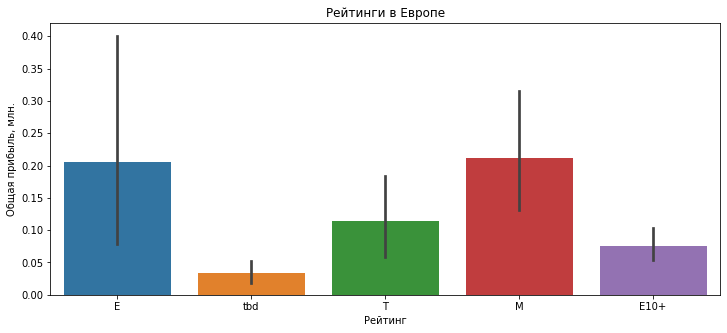

In [49]:
plt.figure(figsize=(12, 5))
sns.barplot(y='eu_sales', x='rating', data = users);
plt.title('Рейтинги в Европе')
plt.xlabel('Рейтинг')
plt.ylabel('Общая прибыль, млн.')
plt.show()

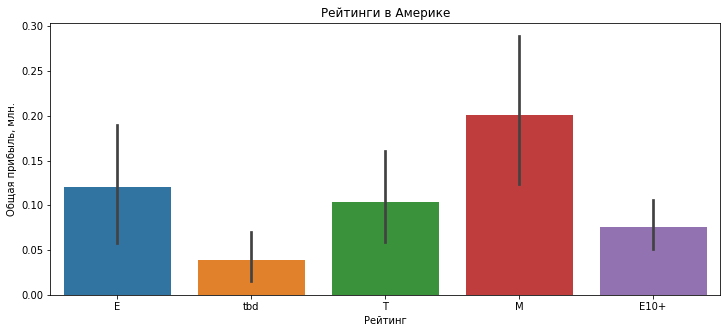

In [50]:
plt.figure(figsize=(12, 5))
sns.barplot(y='na_sales', x='rating', data = users);
plt.title('Рейтинги в Америке')
plt.xlabel('Рейтинг')
plt.ylabel('Общая прибыль, млн.')
plt.show()

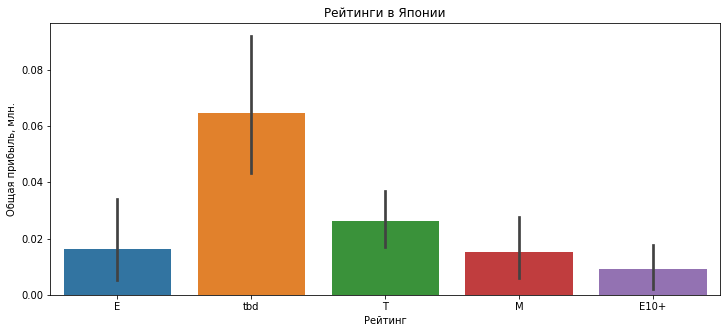

In [51]:
plt.figure(figsize=(12, 5))
sns.barplot(y='jp_sales', x='rating', data = users);
plt.title('Рейтинги в Японии')
plt.xlabel('Рейтинг')
plt.ylabel('Общая прибыль, млн.')
plt.show()

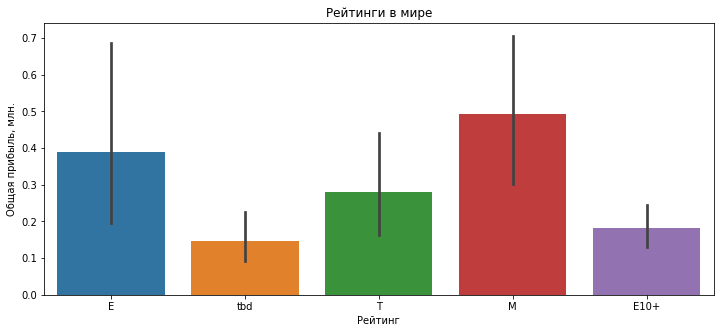

In [52]:
plt.figure(figsize=(12, 5))
sns.barplot(y='total_sales', x='rating', data = users);
plt.title('Рейтинги в мире')
plt.xlabel('Рейтинг')
plt.ylabel('Общая прибыль, млн.')
plt.show()

**Смотря на графики можно сделать вывод, что рейтинг ESRB влияет везде, кроме Японии, т.к. в Японии суммарные продажи у игр без рейтинга заметно больше.**

<div class="alert alert-block alert-success">
 
### Комментарий ревьюера
    
#### Успех

Рассмотрев каждый из регионов, мы пришли к выводу, что каждый из них имеет свою специфику. Это точно стоит учитывать при прогнозе продаж 

### Шаг 5. Проверим гипотезы

**Даны следующие гипотезы:**

**Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;**

**Средние пользовательские рейтинги жанров Action и Sports разные.**

**Сформулируем нулевую и альтернативную гипотезы для первого варианта:**

**Нулевая: Средние пользовательские рейтинги платформ Xbox One и PC равны;**

**Альтернативная: Средние пользовательские рейтинги платформ Xbox One и PC не равны.**

**Создадим две таблицы с пользовательскими оценками пользователе Xbox One и PC:**

In [53]:
xone_user_score = df.query('platform == "XOne"')['user_score']
pc_user_score = df.query('platform == "PC"')['user_score']

**Зададим значние alpha 0.05 и проведем тест:**

In [54]:
alpha = 0.05
results = ttest_ind(xone_user_score, pc_user_score)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Средние пользовательские рейтинги платформ Xbox One и PC не равны')
else:
    print('Средние пользовательские рейтинги платформ Xbox One и PC равны')

p-значение: 0.0007068097266608117
Средние пользовательские рейтинги платформ Xbox One и PC не равны


**По такому же принципу сформулируем гипотезы для второго варианта:**

**Нулевая: Средние пользовательские рейтинги жанров Action и Sports равны;**

**Альтернативная: Средние пользовательские рейтинги жанров Action и Sports не равны.**

<div class="alert alert-block alert-success">
 
### Комментарий ревьюера
    
#### Успех

Гипотезы сформулированы и верно определен метод проверки. С выводами согласен. 

**Создадим две таблицы с оценками пользователей жанров Action и Sports:**

In [55]:
action_score = df.query('genre == "Action"')['user_score']
sports_score = df.query('genre == "Sports"')['user_score']

**Зададим значние alpha 0.05 и проведем тест:**

In [56]:
alpha = 0.05
results = ttest_ind(action_score, sports_score)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Средние пользовательские рейтинги Action и Sports не равны')
else:
    print('Средние пользовательские рейтинги Action и Sports равны')

p-значение: 7.492568776804778e-09
Средние пользовательские рейтинги Action и Sports не равны


<div class="alert alert-block alert-success">
 
### Комментарий ревьюера
    
#### Успех

Аналогично

### Шаг 6. Общий вывод

**Вывод: в ходе этого проекта мы еще раз повторили и закрепили все знания, полученные в спринтах перого модуля обучения. В самом начале мы обработали пропуски и дубликаты в данных. Далее приступили к работе с ними: нашли актуальные платформы, изучили продажи по ним, нашли самые популярные платформы, проверили зависимости продаж от отзывов критиков и пользователей, также нашли самые прибыльные и самые не прибыльные жанры. Далее мы составили портрет каждого пользователя: нашли самые платформы, жанры, убедились что ESRB рейтинг влияет на продажи. В финальной части проекта мы проверили две гипотезы при помощи t-теста.**

<div class="alert alert-block alert-success">
 
### Комментарий ревьюера
    
#### Успех

Итоговый вывод, хоть получился и лаконичным, но отличным дополнением к проекту. С такими полезными инсайтами у нас получится составить прогноз продаж на 2017 год. Я уверен, данных нам для этого хватит. 

<div class="alert alert-block alert-info">

## Итоговый комментарии от ревьюера:
    
#### Успех

Спасибо большое тебе за такую качественную работу. Мне было приятно проверять проект и делиться обратной связью. Особенно впечатлила Предобработка данных. Все достаточно структурировано и последовательно. Ты применяешь верные навыки для работы с кодом. Еще хочу отметить понятные и информативные графики. Однако, в проекте есть несколько замечаний, которые надо исправить:

* Промежуточные выводы добавить.
* Ящик с усами доработать.
* Построить график зависимости хотя бы еще для одной из платформ.
* Найти и определить самый успешный жанр по медиане или среднему.
       
Еще я оставил рекомендации. Очень надеюсь, что ты учтешь их в этом и последующих проектах.
       
Жду проект после доработки. Уверен, ты справишься.
</div>

<div class="alert alert-block alert-success">
 
# Итоговый Комментарий ревьюера ver.2 
    
#### Успех
    
Спасибо тебе за доработку проекта. Вот теперья его готов принять. От себя я хочу пожелать успехов в дальнешей учебе. Ты точно справишься и дальше, я уверен в этом